Create our imports

In [45]:
import requests
import datetime
import matplotlib.pyplot as plt
import pandas as pd

Define a function to get the fundraiser pages

In [5]:
def getPage(page):
    parameters = {
        "fundraiserActivityId": 1180837,
        "pageNumber": page
    }
    return requests.get("https://uk.virginmoneygiving.com/fundraiser-display/getMoreDonationDetails", params=parameters)

Define a function for getting and importing a page

In [14]:
def getPageTop(page):
    response = getPage(page)
    if (response.status_code != 200):
        raise ValueError("not 200, okay response")
    if (len(response.json()['result']) == 0):
        raise ValueError("no fields in response data")
    data = response.json()['result']
    return data[0]

In [164]:
#import data
readings = [];
pages = [1, 100, 200, 300, 500, 1000, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 9000, 10000, 11000, 11500, 11750, 11900, 11950, 11990, 11999, 12000]
for i in pages: #go to page #12001
    page = i
    r = getPageTop(page)
    print(page)
    readings.append({'page': page, 'datetime': r['donationDatetime']})

1
100
200
300
500
1000
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
9000
10000
11000
11500
11750
11900
11950
11990
11999
12000


In [165]:
#transform
readingsReady = []
lastReading = readings[len(readings)-1]
maxPage = lastReading['page']
for r in readings:
    dateRaw = r['datetime']
    humanDateTime = str(datetime.datetime.fromtimestamp(dateRaw / 1e3))
    readingsReady.append({'count': (maxPage - r['page'])*10+1, 'datetime': humanDateTime})

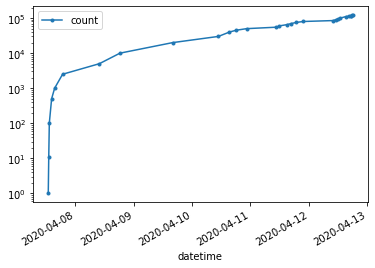

In [166]:
#convert to dataframe
df = pd.DataFrame(readingsReady)
df['datetime']= pd.to_datetime(df['datetime']) 
df.plot('datetime', style='.-', logy=True)